<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-05-14-Linear_Regression/Codes.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
x = np.linspace(-5, 5, 12)
print(x)

[-5.         -4.09090909 -3.18181818 -2.27272727 -1.36363636 -0.45454545
  0.45454545  1.36363636  2.27272727  3.18181818  4.09090909  5.        ]


In [3]:
y = 3*x + 5
print(y)

[-10.          -7.27272727  -4.54545455  -1.81818182   0.90909091
   3.63636364   6.36363636   9.09090909  11.81818182  14.54545455
  17.27272727  20.        ]


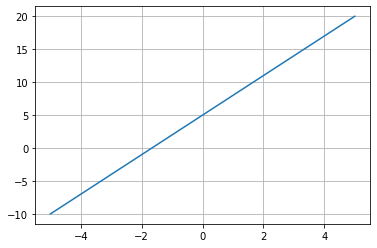

In [4]:
plt.plot(x, y)
plt.grid()
plt.show()

In [5]:
X = x.reshape(-1, 1)
print(x.shape)
print(X.shape)

(12,)
(12, 1)


In [6]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X, y)

LinearRegression()

In [7]:
print('Slope    ', lin.coef_)
print('Intercept', lin.intercept_)

Slope     [3.]
Intercept 4.999999999999999


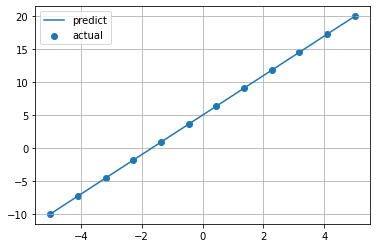

In [8]:
plt.scatter(x, y, label='actual')
plt.plot(x, lin.predict(X), label='predict')

plt.grid()
plt.legend()
plt.show()

3D

In [9]:
x1 = np.linspace(-5, 10, 10)
x2 = np.linspace(-2, 10, 10)

y = 0.1*x1 + 0.6*x2 + 0.2 + np.random.randn(x1.size)

fig = px.scatter_3d(x = x1, y=x2, z=y)
fig.show()

In [10]:
X = np.array([x1,x2]).transpose()
lin.fit(X, y)

print('Slope', lin.coef_)
print('Intercept', lin.intercept_)

Slope [0.37553367 0.30042694]
Intercept 1.2800312339877071


In [11]:
y_pred_lin = lin.predict(X)

In [12]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(
    go.Scatter3d(
        x=x1,
        y=x2,
        z=y,
    )
)

fig.add_trace(
    go.Scatter3d(
        x=x1,
        y=x2,
        z=y_pred_lin,
    )
)


fig.show()

## Task

In [14]:
x = np.linspace(-5, 5, 12)
y = 0*x + 1*(x**2) + 0

df = pd.DataFrame([x, y], ['x1', 'y']).T

df

,x1,y
0,-5.000000,25.000000
1,-4.090909,16.735537
2,-3.181818,10.123967
3,-2.272727,5.165289
4,-1.363636,1.859504
5,-0.454545,0.206612
6,0.454545,0.206612
7,1.363636,1.859504
8,2.272727,5.165289
9,3.181818,10.123967


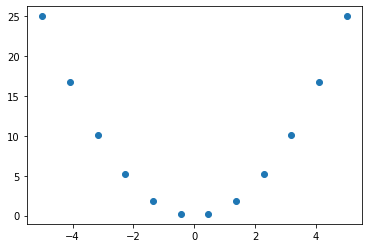

In [15]:
plt.scatter(df['x1'], df['y'])

In [16]:
df['new feature'] = df['x1']**2

In [17]:
X = df.drop(columns=['y'])
Y = df['y']

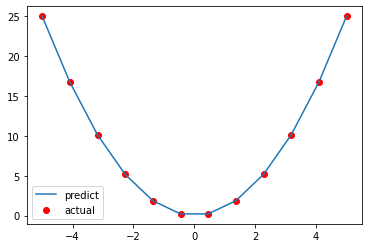

In [18]:
lin.fit(X, Y)

plt.scatter(x, Y, label='actual', color='r')
plt.plot(x, lin.predict(X), label='predict')
plt.legend()
plt.show()

# Implement from Scratch

In [22]:
from IPython.display import clear_output

In [85]:
x=np.linspace(0, 1, 20)
df = pd.DataFrame([x, 0.3*x + 0.2 +np.random.rand(x.size)/20], index=['X', 'y'] ).T

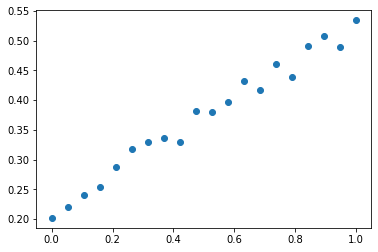

In [87]:
plt.scatter(df['X'], df['y'])

In [136]:
class LinearRegressionScratch():

  def __init__(self, learning_rate = 0.01, iterations = 1000):
    self.learning_rate = learning_rate
    self.iterations = iterations
  
  def fit(self, X, y):
      row, col = X.shape

      self.W = np.random.randn(col)
      # self.W = np.zeros(col)
      self.b = np.random.rand(1)

      # self.learning_rate = 10
      for i in range(self.iterations):
          y_pred = self.predict(X)

          dW = - (2 * X.T.dot(y - y_pred)) / row      # d_cf/d_m
          db = - 2 * (y - y_pred).sum() / row         # d_cf/d_c

          self.W = self.W - self.learning_rate*dW
          self.b = self.b - self.learning_rate*db
          
          # self.learning_rate = 10/(i+1)
          # ploting
          clear_output(wait = True)
          plt.scatter(X[:, 0], y, color='r')
          plt.plot(X[:, 0], self.predict(X))
          plt.title(f"Iteration {i}, lr {self.learning_rate}")
          plt.show()
          
  def predict(self, X):
      return X.dot(self.W) + self.b

In [137]:
model = LinearRegressionScratch(0.1, 300)

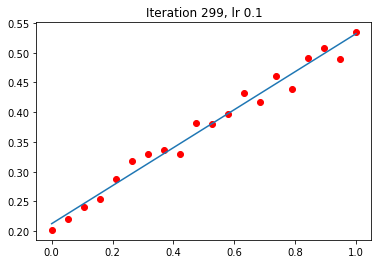

In [138]:
X = df[['X']]
Y = df['y']

model.fit(X.values, np.array(Y.values))